## 连接数据库

In [2]:
#链接数据库

import sqlite3
import pandas as pd

conn = sqlite3.connect('HPL.db')

In [4]:
# 解析文件

def extract(filename, data):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # 遍历每一行并解析数据
    # N      :   80000 
    # NB     :     120 
    # PMAP   : Row-major process mapping
    # P      :       4 
    # Q      :       1 
    # PFACT  :    Left 
    # NBMIN  :       1 
    # NDIV   :       2 
    # RFACT  :    Left 
    # BCAST  :   1ring 
    # DEPTH  :       0 
    # SWAP   : Binary-exchange
    # L1     : transposed form
    # U      : transposed form
    # EQUIL  : yes
    # ALIGN  : 8 double precision words
    
    for i in range(len(lines)):
        line = lines[i]
        if "The following parameter values will be used:" in line: 
            i += 2
            N = lines[i].split()[2]
            NB = lines[i + 1].split()[2]
            PMAP = lines[i + 2].split()[2]
            P = lines[i + 3].split()[2]
            Q = lines[i + 4].split()[2]
            PFACT = lines[i + 5].split()[2]
            NBMIN = lines[i + 6].split()[2]
            NDIV = lines[i + 7].split()[2]
            RFACT = lines[i + 8].split()[2]
            BCAST = lines[i + 9].split()[2]
            DEPTH = lines[i + 10].split()[2]
            SWAP = lines[i + 11].split()[2]
            L1 = lines[i + 12].split()[2]
            U = lines[i + 13].split()[2]
            EQUIL = lines[i + 14].split()[2]


        elif "T/V                N    NB     P     Q               Time                 Gflops" in line:
            line = lines[i + 2]
            parts = line.split()
            Time = parts[-2]
            Gflops = parts[-1]
            TV = parts[0]
            letters = list(TV)
            DEPTH = letters[2]
            BCAST = letters[3]
            RFACT = letters[4]
            NDIV = letters[5]
            PFACT = letters[6]
            NBMIN = letters[7]
            data.append([PMAP, SWAP, L1, U, EQUIL, DEPTH, BCAST, RFACT, NDIV, PFACT, NBMIN, N, NB, P, Q, Time, Gflops])
    return data

插入4core数据

In [5]:
import os

directory_path = "/home/jiayh_lab/cse12012138/BenchmarkOptimization/logs/4cores/"  # 将此路径替换为您要搜索的目录的路径
file_names = [file for file in os.listdir(directory_path) if file.endswith(".out")]
data = []

for filename in file_names:
    print(filename)
    if 'fail' in filename: continue
    extract(directory_path + filename, data)

# 数据类型转换
columns_to_convert = range(11, 17)
data = [
    [float(value) if index in columns_to_convert else value for index, value in enumerate(row)]
    for row in data
]

# 加核数
data = [[4] + row for row in data]
df = pd.DataFrame(data, columns=['cores', 'PMAP', 'SWAP', 'L1', 'U', 'EQUIL', 'DEPTH', 'BCAST', 'RFACT', 'NDIV', 'PFACT', 'NBMIN', 'N', 'NB', 'P', 'Q', 'Time', 'Gflops'])
df

,cores,PMAP,SWAP,L1,U,EQUIL,DEPTH,BCAST,RFACT,NDIV,PFACT,NBMIN,N,NB,P,Q,Time,Gflops


In [4]:
# 存储到数据库
df.to_sql('table1', conn, if_exists='append', index=False)

0

插入24核数据

In [6]:
import os

directory_path = "/home/jiayh_lab/cse12012138/BenchmarkOptimization/logs/24cores/"  # 将此路径替换为您要搜索的目录的路径
file_names = [file for file in os.listdir(directory_path) if file.endswith(".out")]
data = []

for filename in file_names:
    print(filename)
    if 'fail' in filename: continue
    extract(directory_path + filename, data)

# 数据类型转换
columns_to_convert = range(11, 17)
data = [
    [float(value) if index in columns_to_convert else value for index, value in enumerate(row)]
    for row in data
]

# 加核数
data = [[24] + row for row in data]
df = pd.DataFrame(data, columns=['cores', 'PMAP', 'SWAP', 'L1', 'U', 'EQUIL', 'DEPTH', 'BCAST', 'RFACT', 'NDIV', 'PFACT', 'NBMIN', 'N', 'NB', 'P', 'Q', 'Time', 'Gflops'])
df

job.7575.out
job.7613.out
job.7655.out
job.7673.out


,cores,PMAP,SWAP,L1,U,EQUIL,DEPTH,BCAST,RFACT,NDIV,PFACT,NBMIN,N,NB,P,Q,Time,Gflops
0,24,Row-major,Spread-roll,transposed,transposed,no,2,3,C,5,L,5,83995.0,350.0,6.0,4.0,1081.06,365.45
1,24,Row-major,Spread-roll,transposed,transposed,no,3,3,C,8,C,1,77516.0,286.0,3.0,8.0,834.42,372.14
2,24,Row-major,Spread-roll,transposed,transposed,no,3,3,C,7,L,8,67301.0,346.0,3.0,8.0,513.65,395.66
3,24,Row-major,Spread-roll,transposed,transposed,no,3,3,C,8,L,2,81384.0,309.0,24.0,1.0,1340.22,268.14
4,24,Column-major,Spread-roll,transposed,transposed,no,2,3,C,7,L,1,77025.0,287.0,12.0,2.0,940.79,323.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,24,Column-major,Spread-roll,transposed,transposed,no,3,3,C,7,C,7,72918.0,307.0,4.0,6.0,793.33,325.81
596,24,Row-major,Spread-roll,transposed,transposed,no,3,3,C,8,R,1,68158.0,305.0,2.0,12.0,645.84,326.85
597,24,Row-major,Spread-roll,transposed,transposed,no,3,3,C,7,R,1,61257.0,340.0,24.0,1.0,611.86,250.46
598,24,Row-major,Spread-roll,transposed,transposed,no,3,3,C,6,C,4,69749.0,269.0,1.0,24.0,750.80,301.31


In [6]:
# 记得改回来！！！！
df.to_sql("random", conn, if_exists="replace", index=False)

600

## 分析随机数据

In [7]:
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM random ORDER BY Gflops")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,COUNT(*)
0,600


In [9]:
cursor.execute("SELECT * FROM random ORDER BY Gflops DESC LIMIT 10")

results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,cores,PMAP,SWAP,L1,U,EQUIL,DEPTH,BCAST,RFACT,NDIV,PFACT,NBMIN,N,NB,P,Q,Time,Gflops
0,24,Column-major,Spread-roll,transposed,transposed,no,3,3,C,2,L,9,72844.0,279.0,2.0,12.0,318.14,810.01
1,24,Column-major,Spread-roll,transposed,transposed,no,2,3,C,3,L,7,78649.0,295.0,4.0,6.0,434.23,746.92
2,24,Row-major,Spread-roll,transposed,transposed,no,2,3,C,2,L,5,61516.0,308.0,3.0,8.0,215.73,719.40
3,24,Column-major,Spread-roll,transposed,transposed,no,2,3,C,8,R,6,70343.0,269.0,4.0,6.0,332.55,697.81
4,24,Row-major,Spread-roll,transposed,transposed,no,2,3,C,7,C,6,66322.0,332.0,12.0,2.0,310.17,627.04
5,24,Row-major,Spread-roll,transposed,transposed,no,2,3,C,8,R,1,63138.0,337.0,6.0,4.0,274.73,610.80
6,24,Row-major,Spread-roll,transposed,transposed,no,2,3,C,3,C,1,69364.0,277.0,6.0,4.0,364.70,610.09
7,24,Column-major,Spread-roll,transposed,transposed,no,3,3,C,2,L,1,63705.0,317.0,4.0,6.0,282.77,609.56
8,24,Row-major,Spread-roll,transposed,transposed,no,2,3,C,6,C,8,62892.0,303.0,8.0,3.0,273.42,606.56
9,24,Column-major,Spread-roll,transposed,transposed,no,3,3,C,3,C,4,75735.0,346.0,4.0,6.0,477.74,606.20


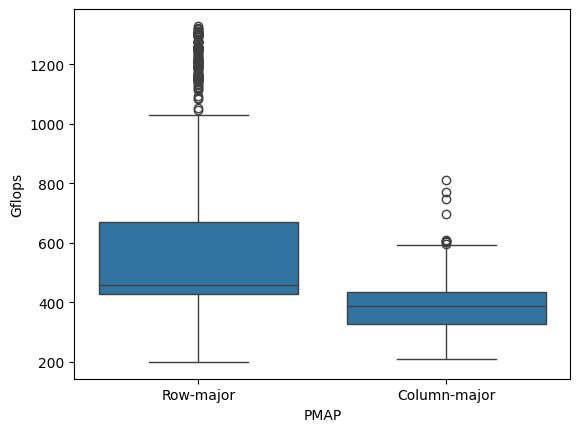

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a connection to your database
# conn = your_database_connection

# Get data from 'table1' and 'random' where 'cores' equals 24
query1 = "SELECT * FROM table1 WHERE cores = 24"
df1 = pd.read_sql(query1, conn)

query2 = "SELECT * FROM random WHERE cores = 24"
df2 = pd.read_sql(query2, conn)

df = pd.concat([df1, df2])
# Assuming 'Parameter1' should be on the x-axis and 'Parameter2' is the distribution
sns.boxplot(x='PMAP', y='Gflops', data=df)

# Show the plot
plt.show()

## 分析数据库内数据

数据库内总共有多少条数据

In [5]:
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM table1 ORDER BY Gflops")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,COUNT(*)
0,6357


### 24核

In [9]:
cursor.execute("SELECT * FROM table1 WHERE cores = 24 ORDER BY Gflops DESC LIMIT 1")

results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,cores,PMAP,SWAP,L1,U,EQUIL,DEPTH,BCAST,RFACT,NDIV,PFACT,NBMIN,N,NB,P,Q,Time,Gflops
0,24,Row-major,Mix,transposed,transposed,yes,0,0,R,2,R,2,79104.0,304.0,4.0,6.0,248.36,1328.7


In [10]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM table1 WHERE cores = 24 AND N = 61000 ORDER BY Gflops DESC LIMIT 10")

results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,cores,PMAP,SWAP,L1,U,EQUIL,DEPTH,BCAST,RFACT,NDIV,PFACT,NBMIN,N,NB,P,Q,Time,Gflops
0,24,Row-major,Spread-roll,transposed,transposed,yes,2,3,C,2,L,2,61000.0,260.0,24.0,1.0,174.88,865.30
1,24,Row-major,Mix,no-transposed,transposed,no,2,3,C,2,L,2,61000.0,260.0,24.0,1.0,177.58,852.18
2,24,Row-major,Spread-roll,transposed,transposed,no,3,3,C,2,L,2,61000.0,260.0,24.0,1.0,178.13,849.51
3,24,Row-major,Spread-roll,transposed,transposed,no,4,3,C,2,L,2,61000.0,260.0,24.0,1.0,178.16,849.38
4,24,Row-major,Mix,no-transposed,transposed,no,3,3,C,2,L,2,61000.0,260.0,24.0,1.0,178.26,848.90
5,24,Row-major,Spread-roll,transposed,transposed,yes,3,3,C,2,L,2,61000.0,260.0,24.0,1.0,178.58,847.40
6,24,Row-major,Spread-roll,no-transposed,transposed,no,2,0,R,2,L,2,61000.0,260.0,24.0,1.0,178.68,846.91
7,24,Row-major,Mix,no-transposed,transposed,no,1,0,R,2,L,2,61000.0,260.0,24.0,1.0,178.76,846.54
8,24,Row-major,Spread-roll,no-transposed,transposed,no,3,3,C,2,L,2,61000.0,260.0,24.0,1.0,178.79,846.40
9,24,Row-major,Mix,transposed,transposed,no,2,3,C,2,L,2,61000.0,260.0,24.0,1.0,178.91,845.80


分析EQUIL

EQUIL no更适合, 0

In [11]:
cursor.execute("SELECT count(*), EQUIL FROM (     SELECT * FROM table1     WHERE cores = 24 AND N=61000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY EQUIL")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),EQUIL
0,8,no
1,2,yes


分析U

U选择transposed, 0

In [12]:
cursor.execute("SELECT count(*), U FROM (     SELECT * FROM table1     WHERE cores = 24 AND N=61000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY U")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),U
0,10,transposed


分析L1

L1选择transposed, 0

In [14]:
cursor.execute("SELECT count(*), L1 FROM (     SELECT * FROM table1     WHERE cores = 24 AND N=61000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY L1")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),L1
0,5,no-transposed
1,5,transposed


分析SWAP

选择Spread-roll (long), 1

In [15]:
cursor.execute("SELECT count(*), SWAP FROM (     SELECT * FROM table1     WHERE cores = 24 AND N=61000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY SWAP")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),SWAP
0,4,Mix
1,6,Spread-roll


分析DEPTH

DEPTH=2

In [16]:
cursor.execute("SELECT count(*), DEPTH FROM (     SELECT * FROM table1     WHERE cores = 24 AND N=61000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY DEPTH")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),DEPTH
0,1,1
1,4,2
2,4,3
3,1,4


分析BCAST

BCAST=3

In [17]:
cursor.execute("SELECT count(*), BCAST FROM (     SELECT * FROM table1     WHERE cores = 24 AND N=61000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY BCAST")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),BCAST
0,2,0
1,8,3


分析RFACT

RFACT=1, crout

In [19]:
cursor.execute("SELECT count(*), RFACT FROM (     SELECT * FROM table1     WHERE cores = 24 AND N=61000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY RFACT")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),RFACT
0,8,C
1,2,R


In [40]:
cursor.execute("SELECT count(*), RFACT FROM table1 GROUP BY RFACT")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),RFACT
0,2117,C
1,2197,L
2,1969,R


分析NDIV

In [37]:
cursor.execute("SELECT count(*), NDIV FROM (     SELECT * FROM table1     WHERE cores = 24 AND N=61000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY NDIV")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),NDIV
0,10,2


In [39]:
cursor.execute("SELECT count(*), NDIV FROM table1 GROUP BY NDIV")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),NDIV
0,3126,2
1,2688,3
2,53,4
3,49,7
4,367,8


### 4核

In [6]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM table1 WHERE cores = 4 ORDER BY Gflops DESC LIMIT 1")

results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,cores,PMAP,SWAP,L1,U,EQUIL,DEPTH,BCAST,RFACT,NDIV,PFACT,NBMIN,N,NB,P,Q,Time,Gflops
0,4,Row-major,Mix,transposed,transposed,yes,0,0,R,2,L,2,89088.0,328.0,2.0,2.0,1294.77,364.07


In [7]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM table1 WHERE cores = 4 AND N = 80000 ORDER BY Gflops DESC LIMIT 10")

results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,cores,PMAP,SWAP,L1,U,EQUIL,DEPTH,BCAST,RFACT,NDIV,PFACT,NBMIN,N,NB,P,Q,Time,Gflops
0,4,Row-major,Binary-exchange,transposed,transposed,no,0,0,L,2,L,1,80000.0,120.0,4.0,1.0,1430.09,238.69
1,4,Row-major,Mix,transposed,transposed,yes,4,0,L,8,L,2,80000.0,120.0,4.0,1.0,1485.07,229.85
2,4,Row-major,Spread-roll,transposed,transposed,no,5,0,L,8,L,2,80000.0,120.0,4.0,1.0,1486.84,229.58
3,4,Row-major,Mix,no-transposed,transposed,yes,4,0,L,8,L,2,80000.0,120.0,4.0,1.0,1487.25,229.51
4,4,Row-major,Mix,no-transposed,transposed,no,4,0,L,8,L,2,80000.0,120.0,4.0,1.0,1489.75,229.13
5,4,Row-major,Spread-roll,transposed,transposed,yes,0,0,L,2,L,1,80000.0,120.0,4.0,1.0,1489.86,229.11
6,4,Row-major,Spread-roll,transposed,transposed,yes,3,0,L,2,L,1,80000.0,120.0,4.0,1.0,1491.41,228.87
7,4,Row-major,Spread-roll,no-transposed,transposed,no,5,0,L,8,L,2,80000.0,120.0,4.0,1.0,1491.56,228.85
8,4,Row-major,Spread-roll,no-transposed,transposed,yes,5,0,L,8,L,2,80000.0,120.0,4.0,1.0,1491.56,228.85
9,4,Row-major,Spread-roll,transposed,transposed,no,0,0,L,2,L,1,80000.0,120.0,4.0,1.0,1492.18,228.75


分析EQUIL

EQUIL=0

In [22]:
cursor.execute("SELECT count(*), EQUIL FROM (     SELECT * FROM table1     WHERE cores = 4 AND N=80000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY EQUIL")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),EQUIL
0,5,no
1,5,yes


分析U

U=0

In [23]:
cursor.execute("SELECT count(*), U FROM (     SELECT * FROM table1     WHERE cores = 4 AND N=80000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY U")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),U
0,10,transposed


分析L1

transposed=0

In [24]:
cursor.execute("SELECT count(*), L1 FROM (     SELECT * FROM table1     WHERE cores = 4 AND N=80000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY L1")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),L1
0,4,no-transposed
1,6,transposed


分析SWAP



In [25]:
cursor.execute("SELECT count(*), SWAP FROM (     SELECT * FROM table1     WHERE cores = 4 AND N=80000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY SWAP")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),SWAP
0,1,Binary-exchange
1,3,Mix
2,6,Spread-roll


In [34]:
cursor.execute("SELECT count(*), SWAP FROM table1 AS top_gflops GROUP BY SWAP")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),SWAP
0,1945,Binary-exchange
1,2372,Mix
2,1966,Spread-roll


分析DEPTH

In [26]:
cursor.execute("SELECT count(*), DEPTH FROM (     SELECT * FROM table1     WHERE cores = 4 AND N=80000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY DEPTH")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),DEPTH
0,3,0
1,1,3
2,3,4
3,3,5


In [33]:
cursor.execute("SELECT count(*), DEPTH FROM table1 AS top_gflops GROUP BY DEPTH")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),DEPTH
0,1206,0
1,867,1
2,864,2
3,852,3
4,844,4
5,820,5
6,796,6
7,24,7
8,10,8


分析BCAST

In [29]:
cursor.execute("SELECT count(*), BCAST FROM (     SELECT * FROM table1     WHERE cores = 4 AND N=80000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY BCAST")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),BCAST
0,10,0


In [32]:
cursor.execute("SELECT count(*), BCAST FROM table1 AS top_gflops GROUP BY BCAST")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),BCAST
0,1725,0
1,1111,1
2,970,2
3,951,3
4,768,4
5,758,5


分析RFACT

In [30]:
cursor.execute("SELECT count(*), RFACT FROM (     SELECT * FROM table1     WHERE cores = 4 AND N=80000     ORDER BY Gflops DESC     LIMIT 10 ) AS top_gflops GROUP BY RFACT")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),RFACT
0,10,L


In [31]:
cursor.execute("SELECT count(*), RFACT FROM table1 AS top_gflops GROUP BY RFACT")
results = cursor.fetchall()
column_names = [column[0] for column in cursor.description]

df = pd.DataFrame(results, columns=column_names)
df

,count(*),RFACT
0,2117,C
1,2197,L
2,1969,R


In [54]:
# 关闭游标和连接
cursor.close()

# 关闭数据库连接
conn.close()